# 3D Tribolium nuclei segmentation
GPU-accelerated image processing makes a lot of sense, especially when processing 3D data. In this notebook we process a little crop of the light-sheet microscopy dataset of a developing Tribolium embryo.

In [1]:
from skimage.io import imread
import pyclesperanto as cle
import numpy as np

# We select the GPU with "RTX" in the name
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8366 MB
	Maximum Object Size: 2091 MB

We download an example dataset and print out the image's dimensionality/shape.

In [2]:
image = imread("https://github.com/clEsperanto/clesperanto_example_data/raw/main/Lund_000500_resampled-cropped.tif")
print(image.shape, image.dtype)

(100, 256, 256) uint16


The `imshow` function of pyclesperanto visualized 3D image stacks by applying a maximum-intensity projection along the Z dimension (100 slices in this example).

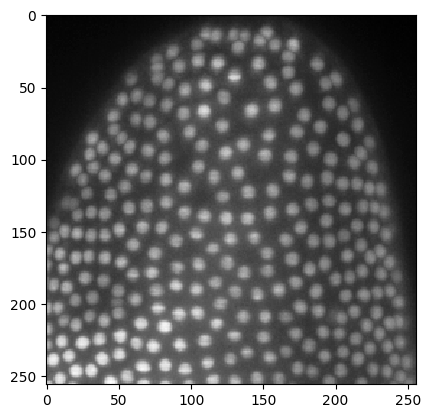

In [3]:
cle.imshow(image)

We can also explicitly perform a `maximum_x_projection` and visualize the result.

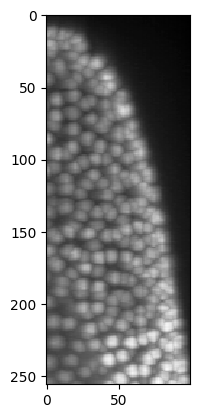

In [4]:
cle.imshow(cle.maximum_x_projection(image))

Next, we performe background subtraction using the [top-hat filter](https://en.wikipedia.org/wiki/Top-hat_transform).

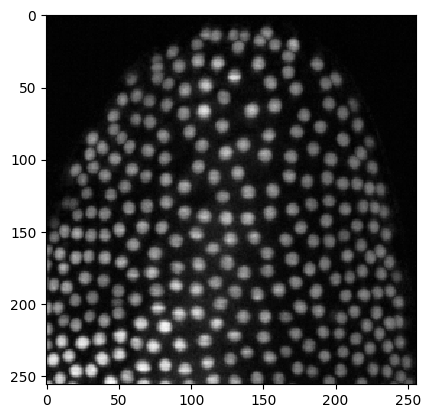

In [11]:
background_subtracted = cle.top_hat_box(image, radius_x=5, radius_y=5, radius_z=5)

cle.imshow(background_subtracted)

The [Voronoi-Otsu-Labeling algorithm](https://github.com/clEsperanto/pyclesperanto_prototype/blob/master/demo/segmentation/voronoi_otsu_labeling.ipynb) applies a chain of operations such as a [Gaussian-blur](https://en.wikipedia.org/wiki/Gaussian_blur), [Otsu's thresholding](https://en.wikipedia.org/wiki/Otsu%27s_method) method and a limited [Voronoi-diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) to segment and label objects.

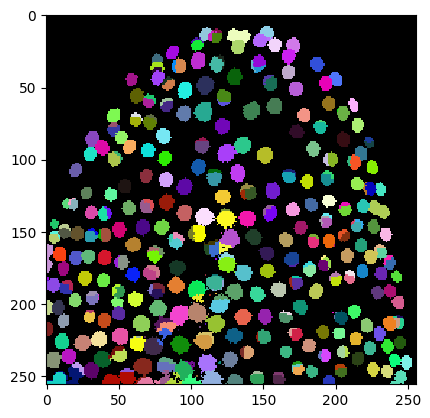

In [6]:
label_image = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma=0, outline_sigma=0)

cle.imshow(label_image, labels=True)

Also these results can be visualized from other perspectives.

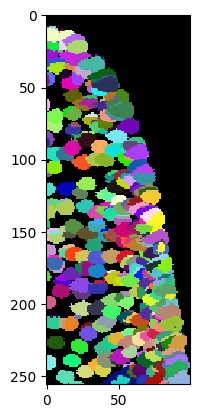

In [7]:
cle.imshow(cle.maximum_x_projection(label_image), labels=True)

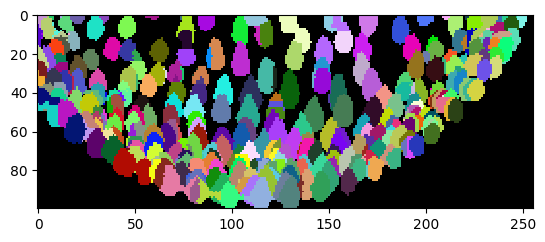

In [8]:
cle.imshow(cle.maximum_y_projection(label_image), labels=True)